In [1]:
import pandas as pd
import math
import numpy as np
df=pd.read_excel('p1_data.xlsx')#这个会直接默认读取到这个Excel的第一个表单


In [2]:
green = df["CFActual (bar chart)"].values
black = df["CFConfig (Black line)"].values
print(len(green))
print(len(black))
print(green)
print(green)
'''
            i_n = i + 1
            i_p = i - 1
            while i_n < line_cnt:
                if not math.isnan(line[i_n]):
                    break
                i_n = i_n + 1
                
                
            while i_p > 0:
                if not math.isnan(line[i_p]):
                        break
                i_p = i_p - 1
'''

55448
55448
[  nan 1.545 2.391 ... 1.211 1.246   nan]
[  nan 1.545 2.391 ... 1.211 1.246   nan]


'\n            i_n = i + 1\n            i_p = i - 1\n            while i_n < line_cnt:\n                if not math.isnan(line[i_n]):\n                    break\n                i_n = i_n + 1\n                \n                \n            while i_p > 0:\n                if not math.isnan(line[i_p]):\n                        break\n                i_p = i_p - 1\n'

In [3]:
def imputation(line):
    line_cnt = len(line)
    query = []
    x_set = []
    y_set = []
    for i in range(line_cnt):
        if math.isnan(line[i]):
            query.append(i)
        else:
            x_set.append(i)
            y_set.append(line[i])

    res = np.interp(query, x_set, y_set)
    j = 0
    for i in res:
        line[query[j]] = i
        j = j + 1

    return line

def detect_outliers2(df):
    outlier_indices = []

    # 1st quartile (25%)
    Q1 = np.percentile(df, 25)
    print(Q1)
    # 3rd quartile (75%)
    Q3 = np.percentile(df, 75)
    print(Q3)
    # Interquartile range (IQR)
    IQR = Q3 - Q1

    # outlier step
    outlier_step = 1.5 * IQR
    delete_list = []
    for i in range(len(df)):
        if (df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step):
            delete_list.append(i)
    df = np.delete(df, delete_list)
    return df


In [4]:
green = imputation(green)
green = detect_outliers2(green)



0.343702380952381
0.9550000000000001


In [5]:
print(len(green))
print(green)

52499
[1.545      1.545      1.67433333 ... 1.211      1.246      1.246     ]


In [6]:
import matplotlib.pyplot as plt

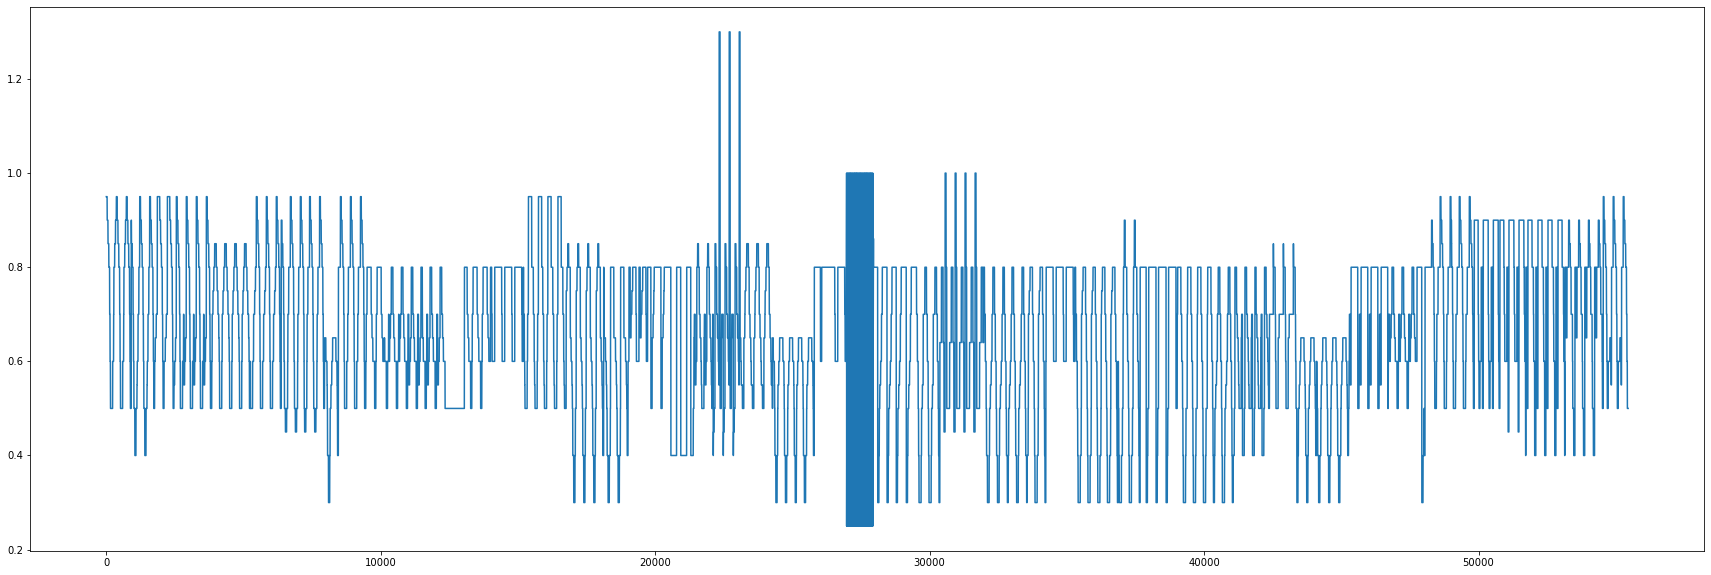

In [7]:
plt.figure(figsize=(30,10))
x = np.arange(len(black))
y = np.array(black)
plt.plot(x, y)
plt.show()

In [16]:
def cal_std(line, st, ed, ava):
    sum_ = 0
    for i in range(st, ed):
        sum_ += math.pow(line[i] - ava, 2)
    std = math.sqrt(float(sum_) / (ed - st))
    return std

def cal_pink_line(line):
    pink_line = np.arange(len(line), dtype=np.float64)
    line_len = len(line)
    st = 0
    ed = st + 7
    while ed < line_len:
        min_ = 10
        max_ = 0
        sum_ = 0
        for i in range(st, ed):
            sum_ = sum_ + line[i]
            if line[i] > max_:
                max_ = line[i]
            if line[i] < min_:
                min_ = line[i]
        
        if ed != st:
            ava = float(sum_) / (ed - st)
        else:
            ava = sum_
        
        for i in range(ed, line_len):
            if (line[i] < (ava + 0.2)) and (line[i] > (ava - 0.2)): # 区间在前七个数据均值上下0.2跳动
                sum_ = sum_ + line[i]
                if line[i] > max_:
                    max_ = line[i]
                if line[i] < min_:
                    min_ = line[i]
                ed = i
            else:
                break
        
        pink = float(min_) + float(3/4)*(max_ - min_)
        range_ = np.arange(st, ed)
        ava = float(sum_) / (ed - st)
        #print(cal_std(line, st, ed, ava))
        print("segment ({},{}) lenth: {}, pink line values: {}, Standard Deviation: {}".format(st, ed, ed - st, pink, cal_std(line, st, ed, ava)))
        pink_line[range_] = pink
        st = ed
        ed = st + 7

    if ed != len(line):
        min_ = 10
        max_ = 0
        sum_ = 0
        for i in range(st, line_len):
            sum_ = sum_ + line[i]
            if line[i] > max_:
                max_ = line[i]
            if line[i] < min_:
                min_ = line[i]
        
        if ed != st:
            ava = float(sum_) / (line_len - st)
        else:
            ava = sum_
            
        pink = float(min_) + float(3/4)*(max_ - min_)
        range_ = np.arange(st, line_len)
        print(range_)
        pink_line[range_] = pink

    return pink_line
        
        
        

In [17]:
print(type(green))

<class 'numpy.ndarray'>


In [18]:
pink_line = cal_pink_line(green)

segment (0,7) lenth: 7, pink line values: 1.3159999999999998, Standard Deviation: 0.5038180528578621
segment (7,15) lenth: 8, pink line values: 0.9702500000000001, Standard Deviation: 0.3231440697951148
segment (15,22) lenth: 7, pink line values: 0.57125, Standard Deviation: 0.25595136655391454
segment (22,29) lenth: 7, pink line values: 1.0095, Standard Deviation: 0.2153432660247872
segment (29,36) lenth: 7, pink line values: 0.7455, Standard Deviation: 0.2111585147876991
segment (36,43) lenth: 7, pink line values: 0.8734999999999999, Standard Deviation: 0.2770768965034142
segment (43,50) lenth: 7, pink line values: 1.13025, Standard Deviation: 0.3791459252755609
segment (50,57) lenth: 7, pink line values: 0.9092499999999999, Standard Deviation: 0.34197571968948737
segment (57,64) lenth: 7, pink line values: 0.44775000000000004, Standard Deviation: 0.12341133312162682
segment (64,71) lenth: 7, pink line values: 1.194, Standard Deviation: 0.3166089295735581
segment (71,78) lenth: 7, pi

segment (30718,30725) lenth: 7, pink line values: 0.732, Standard Deviation: 0.3329974987648909
segment (30725,30735) lenth: 10, pink line values: 0.90075, Standard Deviation: 0.23931002904182685
segment (30735,30742) lenth: 7, pink line values: 0.8204999999999999, Standard Deviation: 0.2366535399253171
segment (30742,30749) lenth: 7, pink line values: 0.7102499999999999, Standard Deviation: 0.32690203931859707
segment (30749,30772) lenth: 23, pink line values: 0.43674999999999997, Standard Deviation: 0.14381255036655236
segment (30772,30780) lenth: 8, pink line values: 0.40725, Standard Deviation: 0.08488425534547354
segment (30780,30817) lenth: 37, pink line values: 0.25775000000000003, Standard Deviation: 0.08718867825363345
segment (30817,30824) lenth: 7, pink line values: 0.37975, Standard Deviation: 0.11030455057499224
segment (30824,30859) lenth: 35, pink line values: 0.50925, Standard Deviation: 0.11355719472549022
segment (30859,30867) lenth: 8, pink line values: 0.12625, Stan

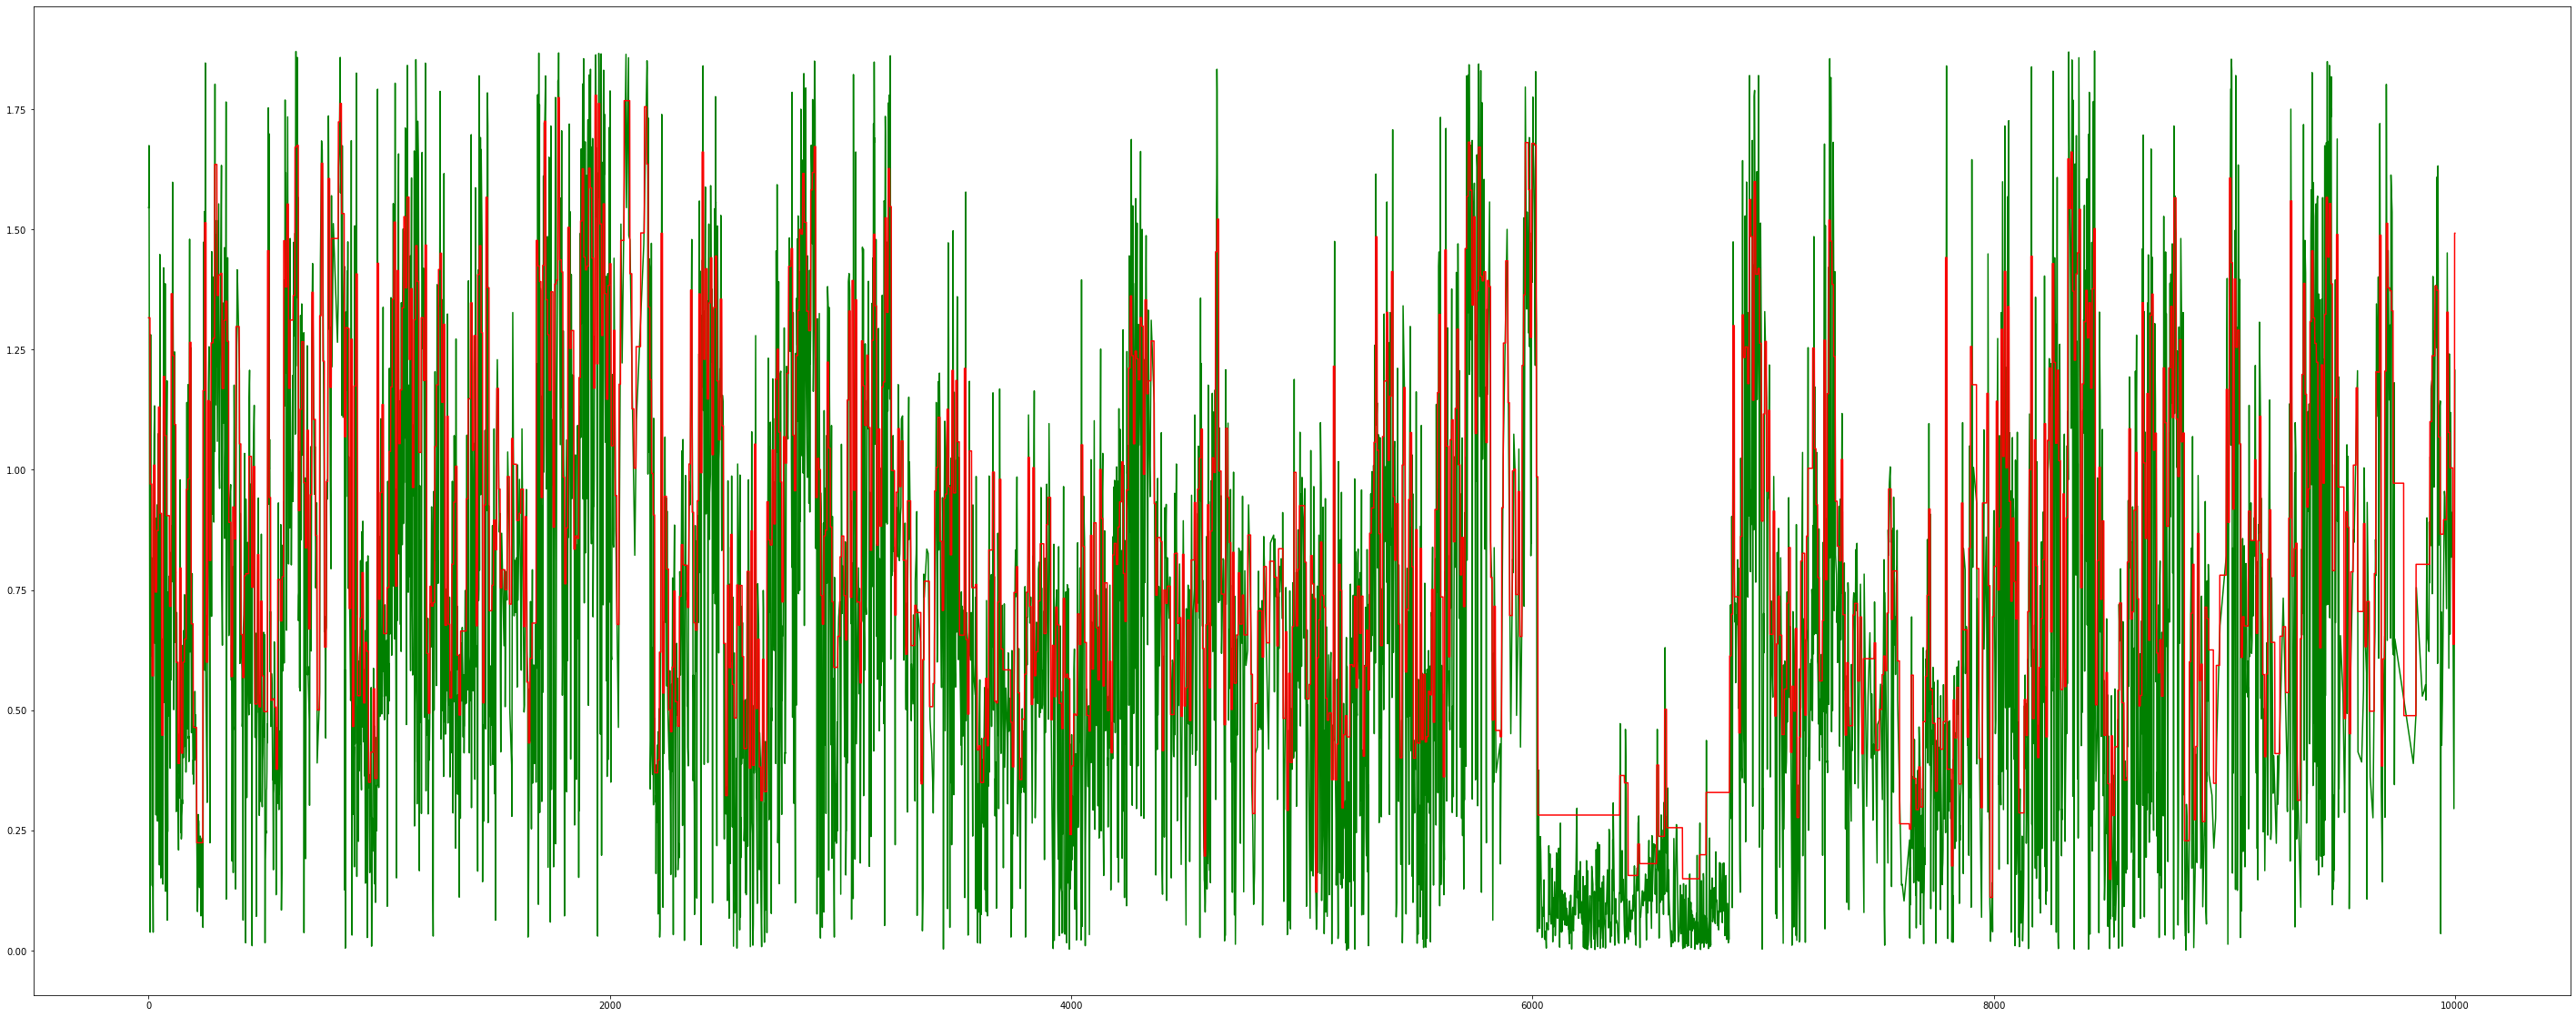

In [19]:
plt.figure(figsize=(50,20))
x = np.arange(len(pink_line[:10000]))
y = np.array(pink_line[:10000])
x_g = np.arange(len(green[:10000]))
y_g = np.array(green[:10000])
plt.plot(x_g, y_g, color='green')
plt.plot(x, y, color='red')
plt.show()

In [73]:
print(pink_line)

[1 1 1 ... 1 1 1]


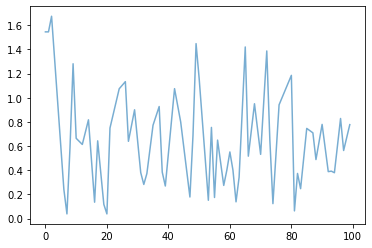

In [78]:
x = np.arange(len(green[:100]))
y = np.array(green[:100])
plt.plot(x, y, alpha=0.6)
plt.show()